# LP2 CUSTOMER CHURN PROJECT

<B>PROJECT DESCRIPTION<b>
#### Customer Churn is the percentage of customers that stopped using a companys' product or service during a certain time frame.In business, understanding the primary cause of a customer churn can assist businesses to create a retention strategy to reduce customer churn and as such boost revenue.This project seeks to build a powerful machine learning pipeline that will estimate or predict the likelihood of a customer leaving vodafone or not.
In this Project, I will: 

1. classify models and help the client, a telecommunication company, to understand their data.
2. Find the lifetime value of each customer and know what factors affect the rate at which customers stop using their network.
3. Predict if a customer will churn or not.

<b> project Workflow<b>

a. hypothesis

b. research questions

c. import 

d. create variable environment

d. load data

# 1. HYPOTHESIS 

<B>NULL HYPOTHESIS:<B>

the number of months the customer has stayed in the company does not affect their churn rate

<B>ALTERNATIVE HYPOTHESIS:<B>

the number of months the customer has stayed in the company  affect their churn rate

# importation 

In [1]:
# Data manipulation packages
import pandas as pd
import numpy as np
 
#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
 
 
# Database connection package
import pyodbc
from dotenv import dotenv_values
 
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

## <b> data importation

In [2]:
# Load environment variables from .env file into a dictionary
environment_variable=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variable.get('SERVER')
database= environment_variable.get('DATABASE')
username = environment_variable.get('USERNAME')
password = environment_variable.get('PASSWORD')

# a connection for server, database, username and password from the env 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# connection to the server
connection=pyodbc.connect(connection_string)

In [3]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"
churn_data = pd.read_sql(query,connection)

In [4]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [6]:
# check total number of the missing values
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [7]:
#check the percentage of the missing values
(churn_data.isnull().sum()/(len(churn_data)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [8]:
churn_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [9]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [10]:
churn_data.describe(include ='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [11]:
#idenfity categorical and numerical columns
cat_columns = churn_data.select_dtypes(include=['object']).columns
print('catagorical variables:')
print(cat_columns)
#numerical columns
num_columns= churn_data.select_dtypes(include=[np.number]).columns
print('mumerical variables:')
print(num_columns)



catagorical variables:
Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')
mumerical variables:
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


-  `missing data`


In [12]:
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
churn_data.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [14]:
#columns with missing values include; multiplelines, online security,
#onlinebackup,deviceprotection,techsupport, streaming tv, streaming movies
#ALL Boleean
boolean_columns_second_data = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines', 
                               'TechSupport', 'StreamingMovies', 'StreamingTV']

for column in boolean_columns_second_data:
    churn_data[column] = churn_data[column].astype(bool)

 # Convert the Churn into a boolean Column

churn_data['Churn'] = churn_data['Churn'].astype(bool)


In [15]:
# Check for missing values in each column
print(churn_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64


 ### <b> <i><u> `load telco churn csv file `<b>

In [16]:
#loading the second file of the telco -churn -second file
telco_data2= pd.read_csv('LP2_Telco-churn-second-2000.csv')
telco_data2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [17]:
# Check for missing values in each column
print(telco_data2.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## <b><u> DATA EXPLORATION <U>

- #### INFO
- #### DUPLICATED
- #### DESCRIBE
- #### NULLVALUES


In [18]:
##INFO
telco_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [19]:
telco_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [20]:
telco_data2.describe(include='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [21]:
telco_data2.duplicated().sum()

0

In [22]:
# List of columns to be converted to boolean 
boolean_columns_first_data = ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
                               'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling']

# Function to convert "Yes", "No", to True and False
def map_yes_no_to_boolean(value):
    return value.lower() == 'yes'

# Iterate through the list and convert corresponding columns in data2 to boolean type
for column in boolean_columns_first_data:
    telco_data2[column] = telco_data2[column].map(map_yes_no_to_boolean)


In [23]:
# We converted the yes&no to True and Yes 

def map_yes_no_to_bool(value):
    return value.lower()=='yes'

telco_data2['Churn'] = telco_data2['Churn'].map(map_yes_no_to_bool)


In [24]:
#Senior column' is the column I  want to convert

telco_data2['SeniorCitizen'] = telco_data2['SeniorCitizen'].astype(bool)

## *MERGING THE DATASET*


In [25]:
vodafone_df= pd.concat([churn_data,telco_data2])
vodafone_df.to_csv('vodafone_customer_churn.csv')
voda_df = pd.read_csv('vodafone_customer_churn.csv')
voda_df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [26]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   bool   
 4   Partner           5043 non-null   bool   
 5   Dependents        5043 non-null   bool   
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   bool   
 8   MultipleLines     5043 non-null   bool   
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    5043 non-null   bool   
 11  OnlineBackup      5043 non-null   bool   
 12  DeviceProtection  5043 non-null   bool   
 13  TechSupport       5043 non-null   bool   
 14  StreamingTV       5043 non-null   bool   
 15  StreamingMovies   5043 non-null   bool   
 16  Contract          5043 non-null   object 


## **cleaning the data sets**

In [27]:
#dropping colomn known as the unnamed 0
voda_df = voda_df.drop(columns=['Unnamed: 0'])

In [28]:
voda_df.describe(include="object").T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
InternetService,5043,3,Fiber optic,2248
Contract,5043,3,Month-to-month,2744
PaymentMethod,5043,4,Electronic check,1700
TotalCharges,5038,4870,20.450000762939453,5


## **data exploation**

<Axes: >

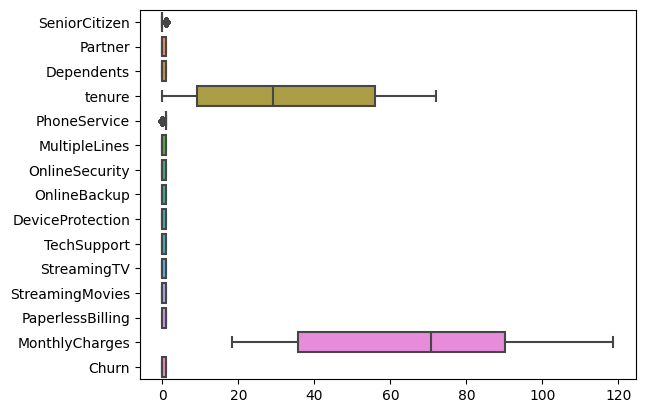

In [29]:
#Use descriptive statistics and visualizations to understand the distribution of variables, identify outliers, and get a sense of the data
# Boxplot Visualization

sns.boxplot(data=voda_df, orient='h')

##### **UNIVARIATE ANALYSIS**

<function matplotlib.pyplot.show(close=None, block=None)>

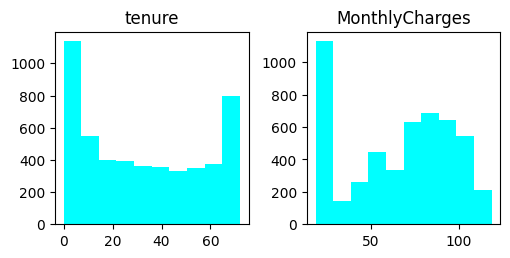

In [30]:
voda_df.hist(figsize=(9,9),grid=False,layout=(3,3),color="Cyan")
plt.show

## <b>  Count Plots for Categorical Columns

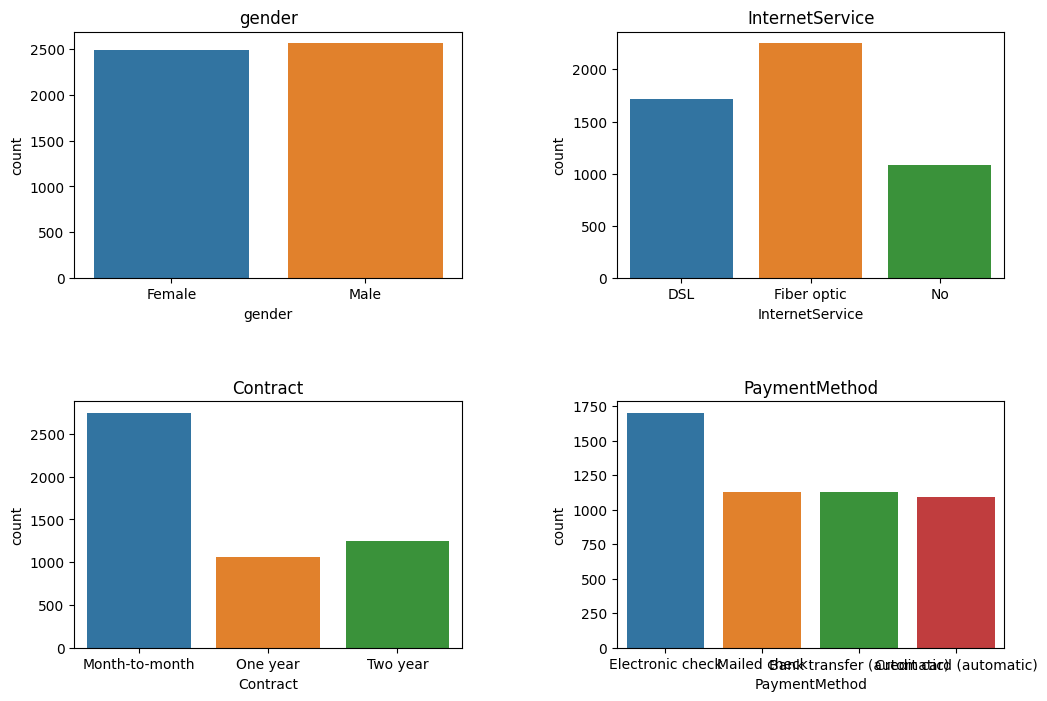

In [31]:
# List of columns containing categorical values
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Set up subplots for better visibility with adjusted size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust vertical and horizontal spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=voda_df, x=column, ax=axes[i])

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Hide empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the count plots
plt.show()

#### **Count Plots for Categorical Columns**

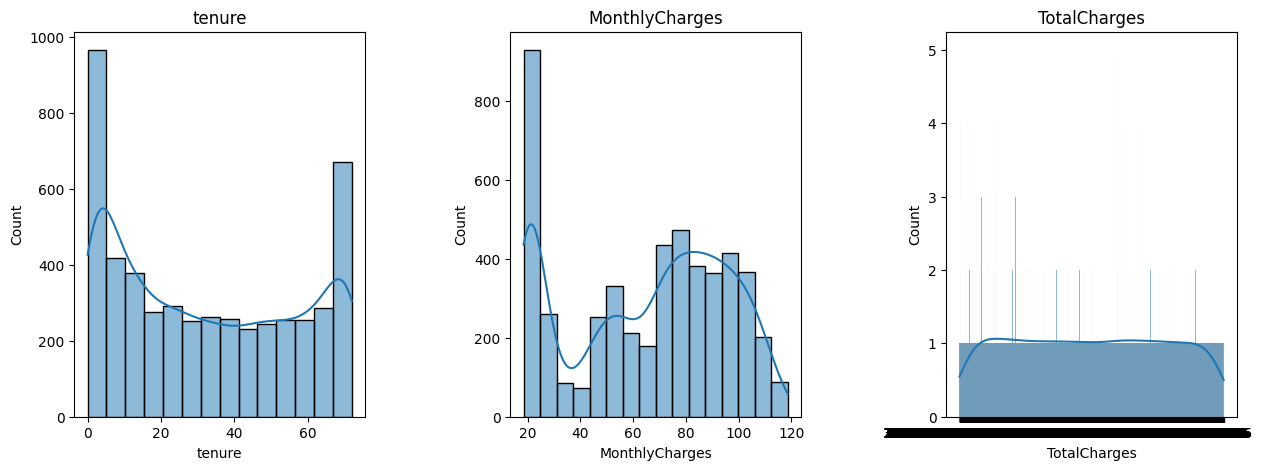

In [32]:

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create a histogram using Seaborn
    sns.histplot(data=voda_df, x=column, kde=True, ax=axes[i])

    # Add a title to the histogram with the name of the column
    axes[i].set_title(column)

# Show the subplots for numerical histograms
plt.show()


## <b> Bivariate analysis

                  tenure  MonthlyCharges
tenure          1.000000        0.240645
MonthlyCharges  0.240645        1.000000


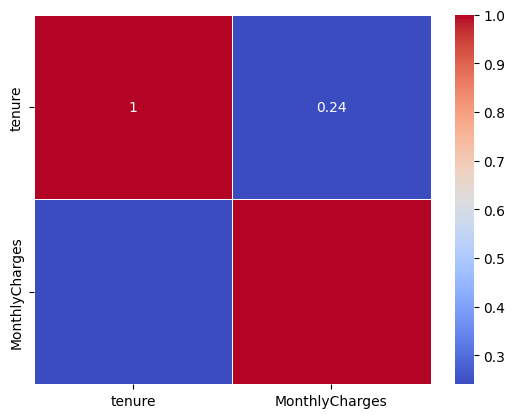

In [33]:
numeric_columns = voda_df.select_dtypes(include=['number']).columns
correlation_matrix = voda_df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## **multivariate analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

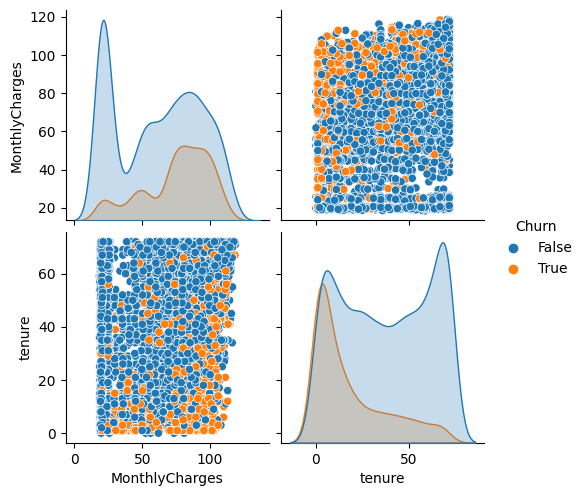

In [34]:
data=voda_df[['Churn', 'MonthlyCharges','TotalCharges','tenure']]


sns.pairplot(data, hue='Churn')
plt.show

##  **data splitting**

In [35]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = voda_df.drop('Churn', axis=1)  #'Churn' is the target variable
y = voda_df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4034, 20)
Shape of X_test: (1009, 20)
Shape of y_train: (4034,)
Shape of y_test: (1009,)


### List of things done below

- `Impute missing values with mean`
- `Standardize numeric features`
- `Power transform for skewness`
- `Impute missing values with most frequent`
- `One-hot encode categorical features`

In [36]:
categorical_features = X.select_dtypes(include=['bool', 'object']).columns

categorical_features

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges'],
      dtype='object')

In [37]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_features

Index(['tenure', 'MonthlyCharges'], dtype='object')

### <b> PIPELINES

In [38]:

# Numeric pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),            
    ('scaler', StandardScaler()),                            
    ('power_transformer', PowerTransformer(method="yeo-johnson")) 
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))       
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
